## Reference Counting

Method that returns the reference count for a given variable's memory address:

In [1]:
import ctypes

def ref_count(address):
    return ctypes.c_long.from_address(address).value

Let's make a variable, and check it's reference count:

In [2]:
my_var = [1, 2, 3, 4]
ref_count(id(my_var))

1

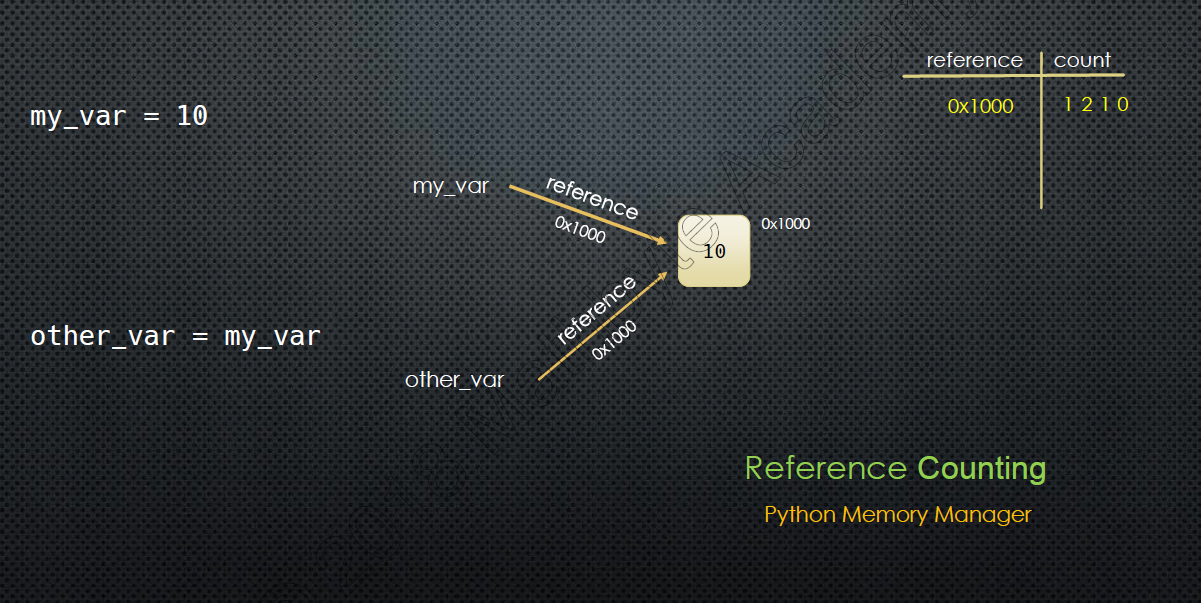

There is another built-in function we can use to obtain the reference count:

In [3]:
import sys
sys.getrefcount(my_var)

2

But why is this returning 2, instead of the expected 1 we obtained with the previous function?

Answer: The *sys.getrefcount()* function takes **my_var** as an argument, this means it receives (and stores) a reference to **my_var**'s memory address **also** - hence the count is off by 1. So we will use *from_address()* instead.

We make another reference to the **same** reference as `my_var`:

In [4]:
other_var = my_var

Let's look at the memory address of those two variables and the reference counts:

In [5]:
print(hex(id(my_var)), hex(id(other_var)))
print(ref_count(id(my_var)))

0x1e43f368388 0x1e43f368388
2


Force one reference to go away:

In [6]:
other_var = None

And we look at the reference count again:

In [7]:
print(ref_count(id(my_var)))

1


We see that the reference count has gone back to 1.

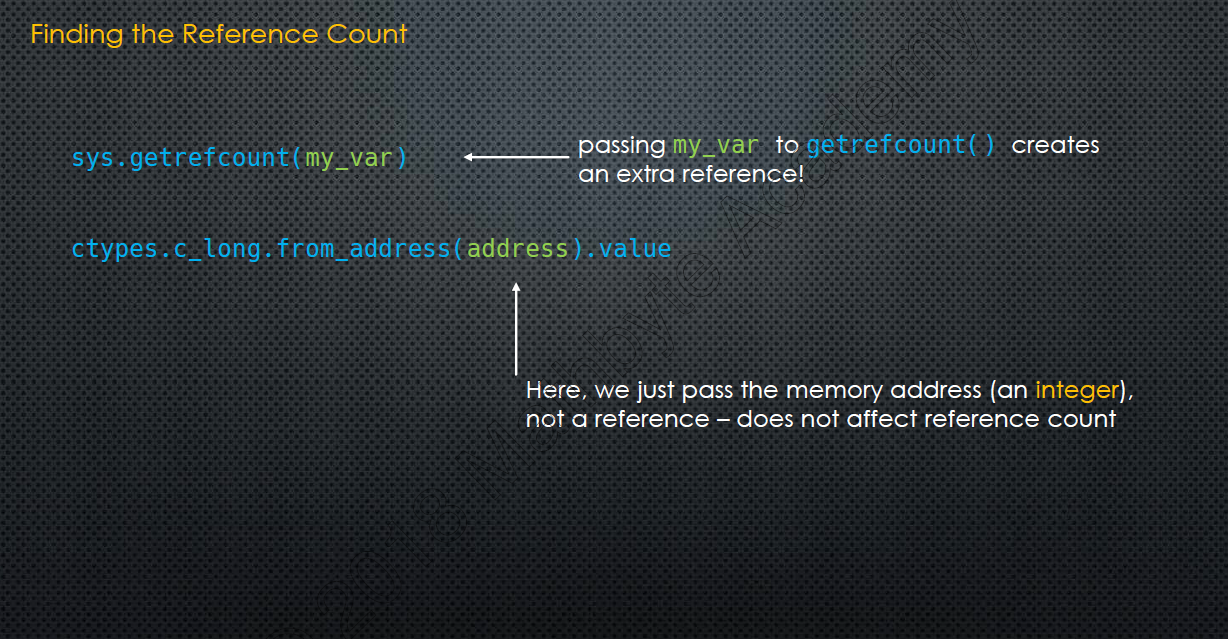

You'll probably never need to do anything like this in Python. Memory management is completely transparent - this is just to illustrate some of what is going behind the scenes as it helps to understand upcoming concepts.